# Imports:

In [87]:
from collections import defaultdict
import sys, os, re, argparse, natsort
import pandas as pd
import numpy as np
from tqdm import tqdm
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from IPython.display import display, HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/hide the code."></form>''')

# Functions:

In [88]:
def read_annotation(file):
    columns = ["sample", "nb_circ_tot", "nb_tot_exonic", "nb_start_end_exonic", 
               "nb_probable_exonic", "nb_antisens_exonic", "nb_monoexonic", 
               "nb_infraexonic_tot", "nb_infraexonic_sens", "nb_infraexonic_antisens",
               "nb_infraintronic_tot", "nb_infraintronic_sens", "nb_infraintronic_antisens",
               "nb_tot_intronic", "nb_true_intronic", "nb_possible_intron_derived", 
               "nb_lariat_derived", "nb_intron_circles", "nb_possible_antisens_intron_derived", 
               "nb_circ_intronic_localization", "nb_circ_annotated", 
               "nb_circ_classified", "nb_circ_non_annotated"]
    df = pd.read_table(file, sep = '\t', names=columns)
    return df

# I. Number of circRNAs for each category: 

In [89]:
df_stats_annot = read_annotation("../stats_annotation_all.tsv")
display(df_stats_annot.head(5))

,sample,nb_circ_tot,nb_tot_exonic,nb_start_end_exonic,nb_probable_exonic,nb_antisens_exonic,nb_monoexonic,nb_infraexonic_tot,nb_infraexonic_sens,nb_infraexonic_antisens,...,nb_tot_intronic,nb_true_intronic,nb_possible_intron_derived,nb_lariat_derived,nb_intron_circles,nb_possible_antisens_intron_derived,nb_circ_intronic_localization,nb_circ_annotated,nb_circ_classified,nb_circ_non_annotated
0,pig-testis-54,5428,3932,3531,399,1,100,192,187,5,...,677,24,23,10,0,0,1,3557,1052,819
1,cow-testis-adult1,2376,1737,1511,226,0,56,89,87,2,...,204,4,3,1,1,0,0,1515,426,435
2,cow-liver-B022,2187,1415,1240,175,0,33,324,324,0,...,215,5,3,2,2,0,0,1245,385,557
3,cow-liver-K013,2233,1388,1207,181,0,36,456,454,2,...,222,3,3,2,0,0,0,1210,400,623
4,cow-liver-B027,2794,1695,1477,218,0,42,613,609,4,...,262,4,0,0,3,0,1,1481,476,837


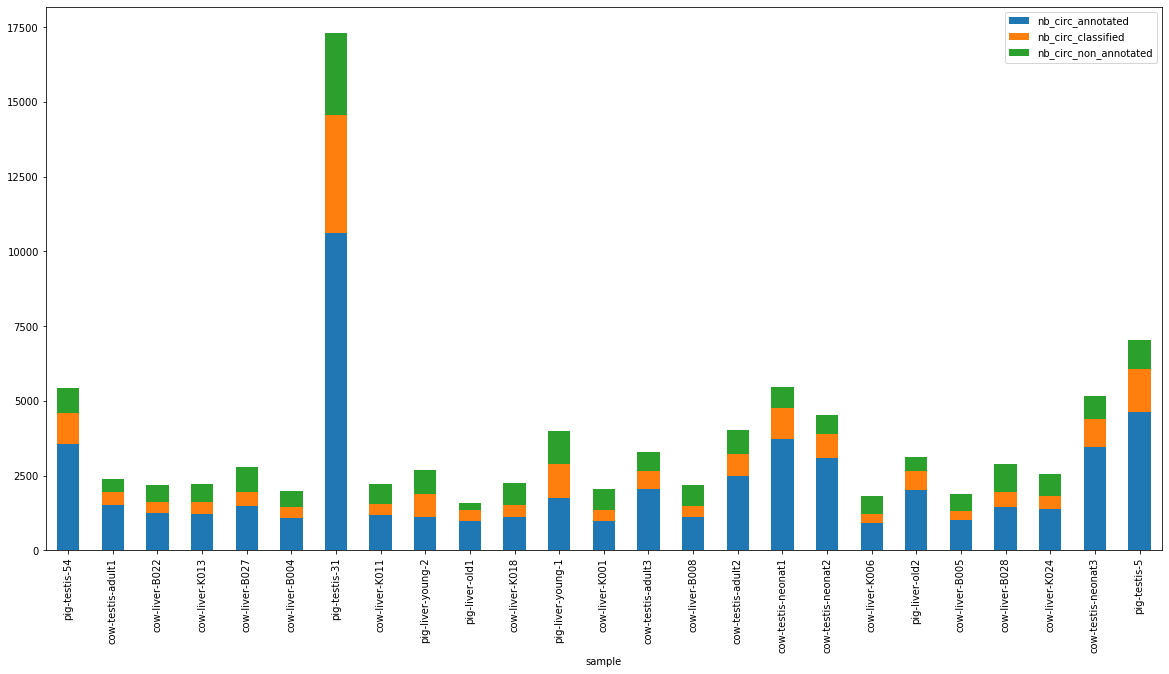

In [90]:
# Stacked bar plot:
columns_df1 = ["sample", "nb_circ_annotated", "nb_circ_classified", 
               "nb_circ_non_annotated"]
df1 = pd.DataFrame(df_stats_annot, columns=columns_df1)
df1.plot.bar(x='sample', stacked=True, figsize=(20,10));

,pig-testis-54,cow-testis-adult1,cow-liver-B022,cow-liver-K013,cow-liver-B027,cow-liver-B004,pig-testis-31,cow-liver-K011,pig-liver-young-2,pig-liver-old1,...,cow-testis-adult2,cow-testis-neonat1,cow-testis-neonat2,cow-liver-K006,pig-liver-old2,cow-liver-B005,cow-liver-B028,cow-liver-K024,cow-testis-neonat3,pig-testis-5
Annotated,65.530582,63.762626,56.927298,54.187192,53.006442,55.257836,61.245235,53.252033,41.397250,62.932662,...,61.699477,68.098720,68.03532,50.886918,65.137909,53.382664,50.503997,53.876427,66.705292,65.799943
Classified,19.380987,17.929293,17.604024,17.913121,17.036507,17.947422,22.877440,17.299006,28.167967,21.522970,...,18.963369,18.957952,18.12362,17.350333,20.429763,16.860465,17.518248,17.906336,18.230977,20.275646
Non-annotated,15.088430,18.308081,25.468679,27.899687,29.957051,26.794742,15.877325,29.448961,30.434783,15.544368,...,19.337154,12.943327,13.84106,31.762749,14.432328,29.756871,31.977755,28.217237,15.063731,13.924410


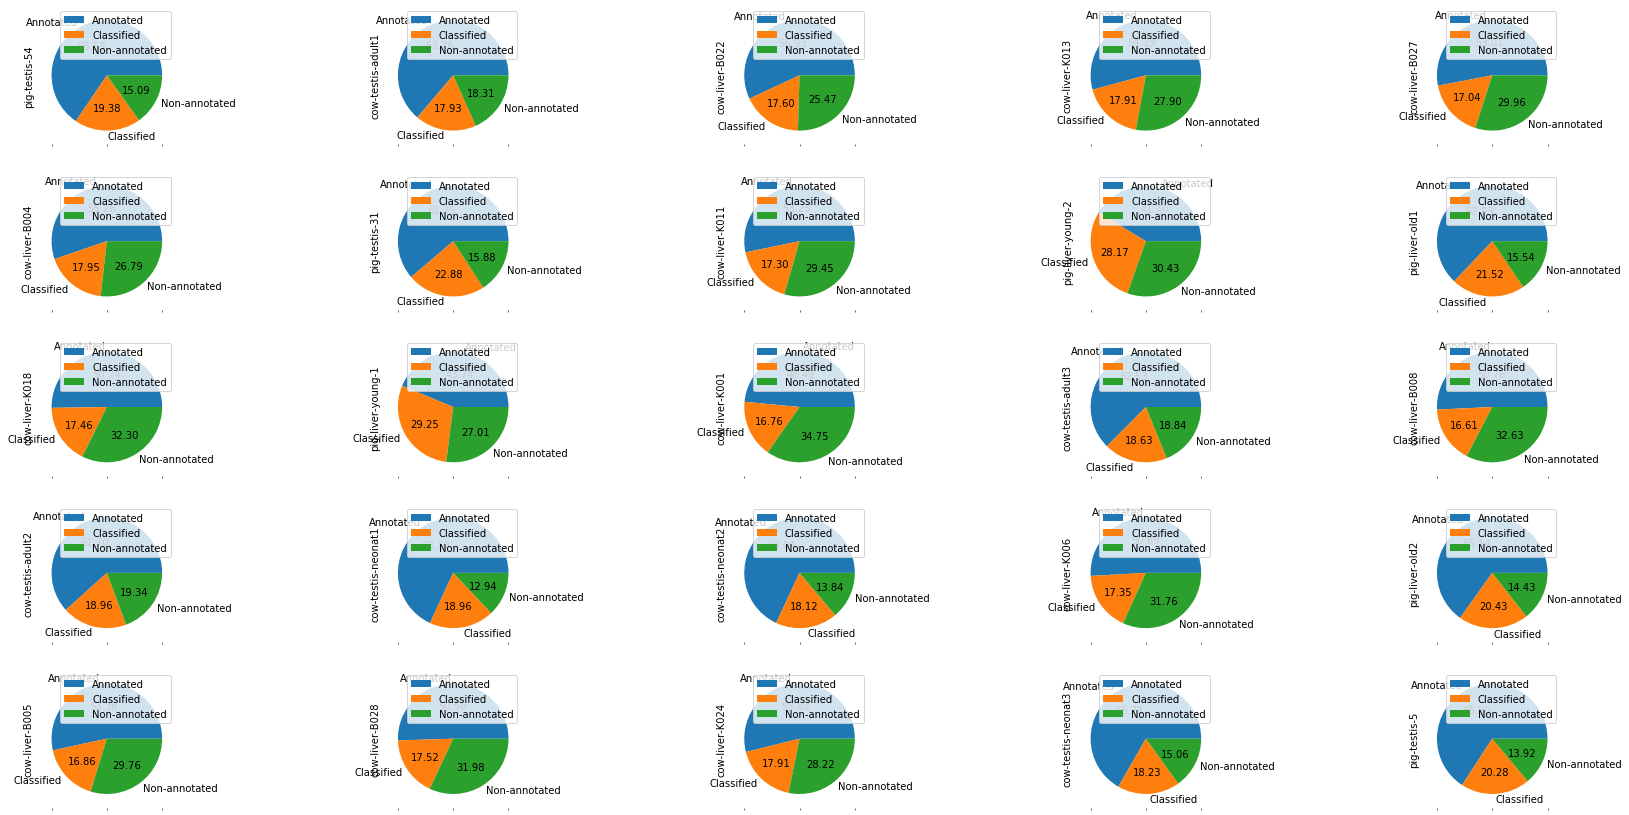

In [91]:
# Pie:
df1["%_circ_annotated"] = (df_stats_annot["nb_circ_annotated"]*100)/df_stats_annot["nb_circ_tot"]
df1["%_circ_classified"] = (df_stats_annot["nb_circ_classified"]*100)/df_stats_annot["nb_circ_tot"]
df1["%_circ_non_annotated"] = (df_stats_annot["nb_circ_non_annotated"]*100)/df_stats_annot["nb_circ_tot"]
d = df1.set_index('sample')[["%_circ_annotated","%_circ_classified","%_circ_non_annotated"]].T.to_dict('list')
df2 = pd.DataFrame(d, index=['Annotated', 'Classified', 'Non-annotated'])
display(df2.head(5))
plot = df2.plot.pie(subplots=True, autopct='%.2f', figsize=(30, 30), layout=(10,5));

,pig-testis-54,cow-testis-adult1,cow-liver-B022,cow-liver-K013,cow-liver-B027,cow-liver-B004,pig-testis-31,cow-liver-K011,pig-liver-young-2,pig-liver-old1,...,cow-testis-adult2,cow-testis-neonat1,cow-testis-neonat2,cow-liver-K006,pig-liver-old2,cow-liver-B005,cow-liver-B028,cow-liver-K024,cow-testis-neonat3,pig-testis-5
Exonic,72.439204,73.106061,64.700503,62.158531,60.665712,63.346815,68.297332,60.523939,44.853214,65.575834,...,72.539247,77.276051,76.423841,58.481153,69.563823,60.465116,57.733750,61.589925,75.260718,73.003694
Intronic,0.442152,0.168350,0.228624,0.134348,0.143164,0.202224,0.791267,0.180668,0.743218,0.629327,...,0.299028,0.292505,0.264901,0.110865,0.481078,0.369979,0.139034,0.236128,0.366937,0.369423
Non-annotated,27.118644,26.725589,35.070873,37.707120,39.191124,36.450961,30.911401,39.295393,54.403567,33.794840,...,27.161724,22.431444,23.311258,41.407982,29.955099,39.164905,42.127216,38.173947,24.372345,26.626883


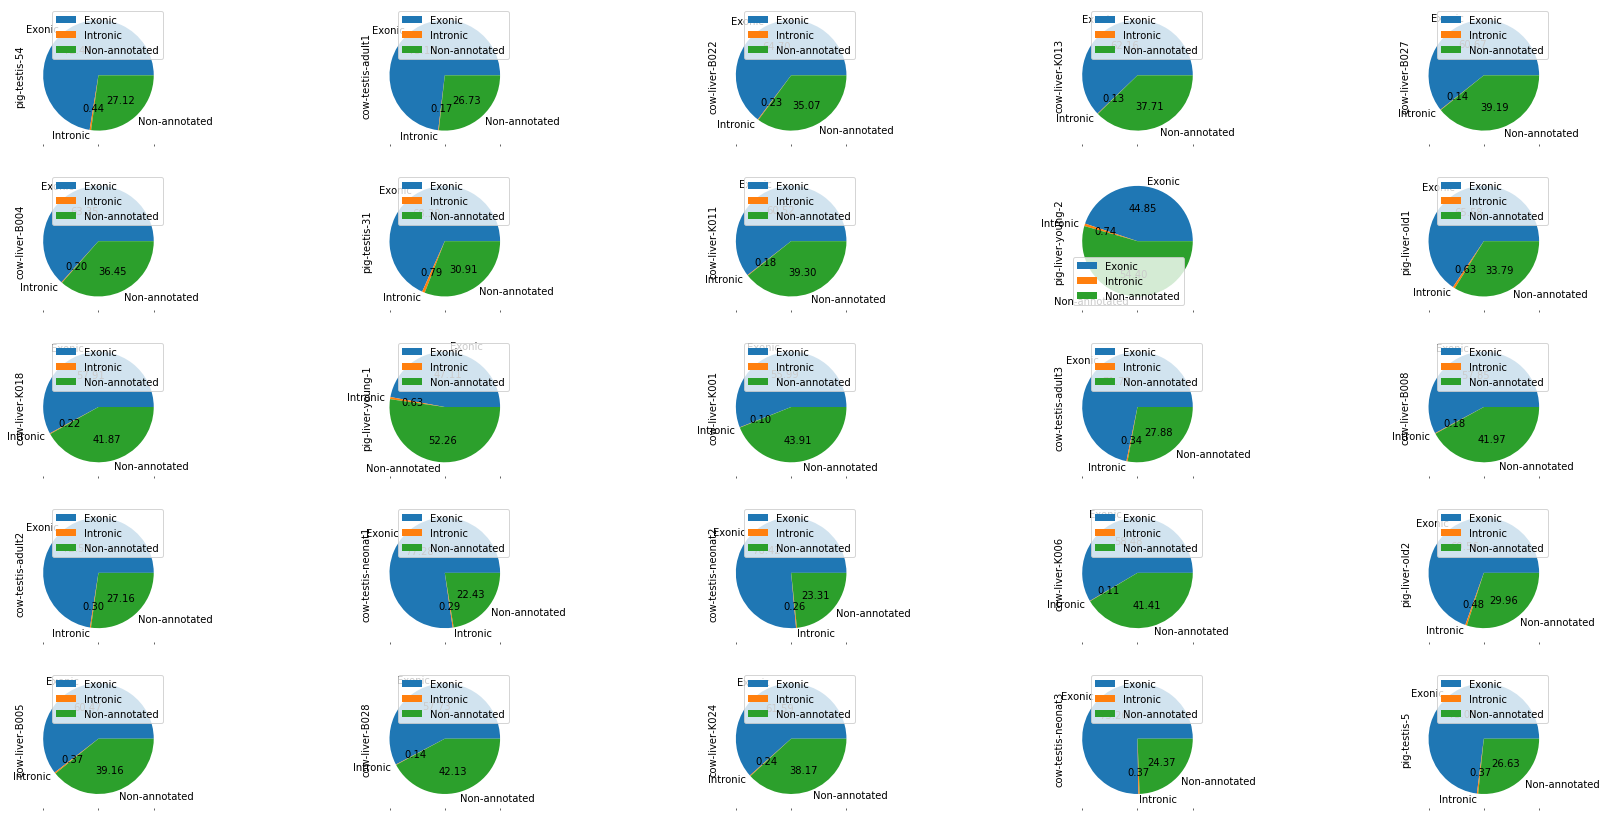

In [111]:
# Pie:
columns_types = ["sample", "nb_circ_tot", "nb_tot_exonic", "nb_tot_intronic", 
                 "nb_true_intronic", "nb_circ_non_annotated"]
df_types = pd.DataFrame(df_stats_annot, columns=columns_types)
df_types["nb_other_intronic"] = df_types["nb_tot_intronic"] - df_types["nb_true_intronic"]
df_types["non_annotated"] = df_types["nb_circ_non_annotated"] + df_types["nb_other_intronic"]
df_types["%_exonic"] = (df_types["nb_tot_exonic"]*100)/df_types["nb_circ_tot"]
df_types["%_intronic"] = (df_types["nb_true_intronic"]*100)/df_types["nb_circ_tot"]
df_types["%_non_annotated"] = (df_types["non_annotated"]*100)/df_types["nb_circ_tot"]
d = df_types.set_index('sample')[["%_exonic","%_intronic","%_non_annotated"]].T.to_dict('list')
df_types = pd.DataFrame(d, index=['Exonic', 'Intronic', 'Non-annotated'])
display(df_types.head(5))
plot = df_types.plot.pie(subplots=True, autopct='%.2f', figsize=(30, 30), layout=(10,5));

# II. Exonic circRNAs:

## a. Number of exonic circRNAs for each category:

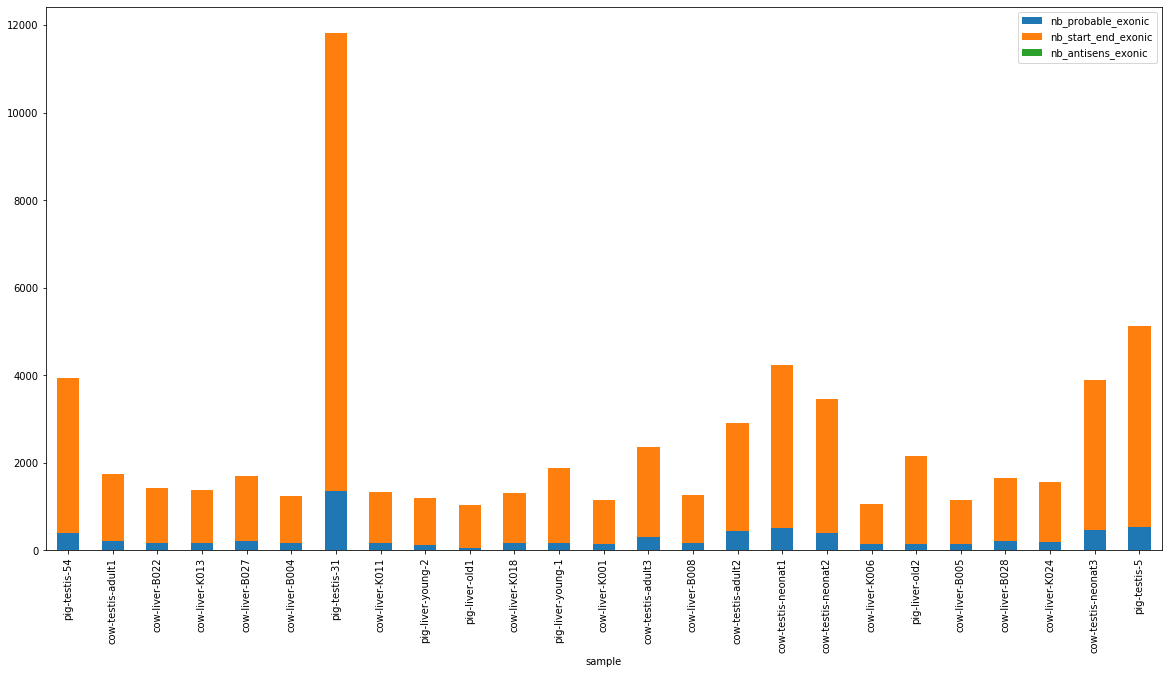

In [92]:
# Stacked bar plot:
columns_df3 = ["sample", "nb_probable_exonic", "nb_start_end_exonic", 
               "nb_antisens_exonic"]
df3 = pd.DataFrame(df_stats_annot, columns=columns_df3)
df3.plot.bar(x='sample', stacked=True, figsize=(20,10));

,pig-testis-54,cow-testis-adult1,cow-liver-B022,cow-liver-K013,cow-liver-B027,cow-liver-B004,pig-testis-31,cow-liver-K011,pig-liver-young-2,pig-liver-old1,...,cow-testis-adult2,cow-testis-neonat1,cow-testis-neonat2,cow-liver-K006,pig-liver-old2,cow-liver-B005,cow-liver-B028,cow-liver-K024,cow-testis-neonat3,pig-testis-5
Probable (sens),10.147508,13.010938,12.367491,13.040346,12.861357,13.088587,11.484144,12.313433,9.362055,4.990403,...,15.355548,12.254554,11.322935,13.175355,7.053942,12.325175,12.763396,12.907348,11.855273,10.373686
Start-End (sens),89.801628,86.989062,87.632509,86.959654,87.138643,86.911413,88.515856,87.686567,90.555095,94.913628,...,84.644452,87.745446,88.648180,86.824645,92.899954,87.674825,87.236604,87.028754,88.119066,89.606851
Antisens,0.025432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.028885,0.000000,0.000000,0.000000,0.000000,0.063898,0.025661,0.000000


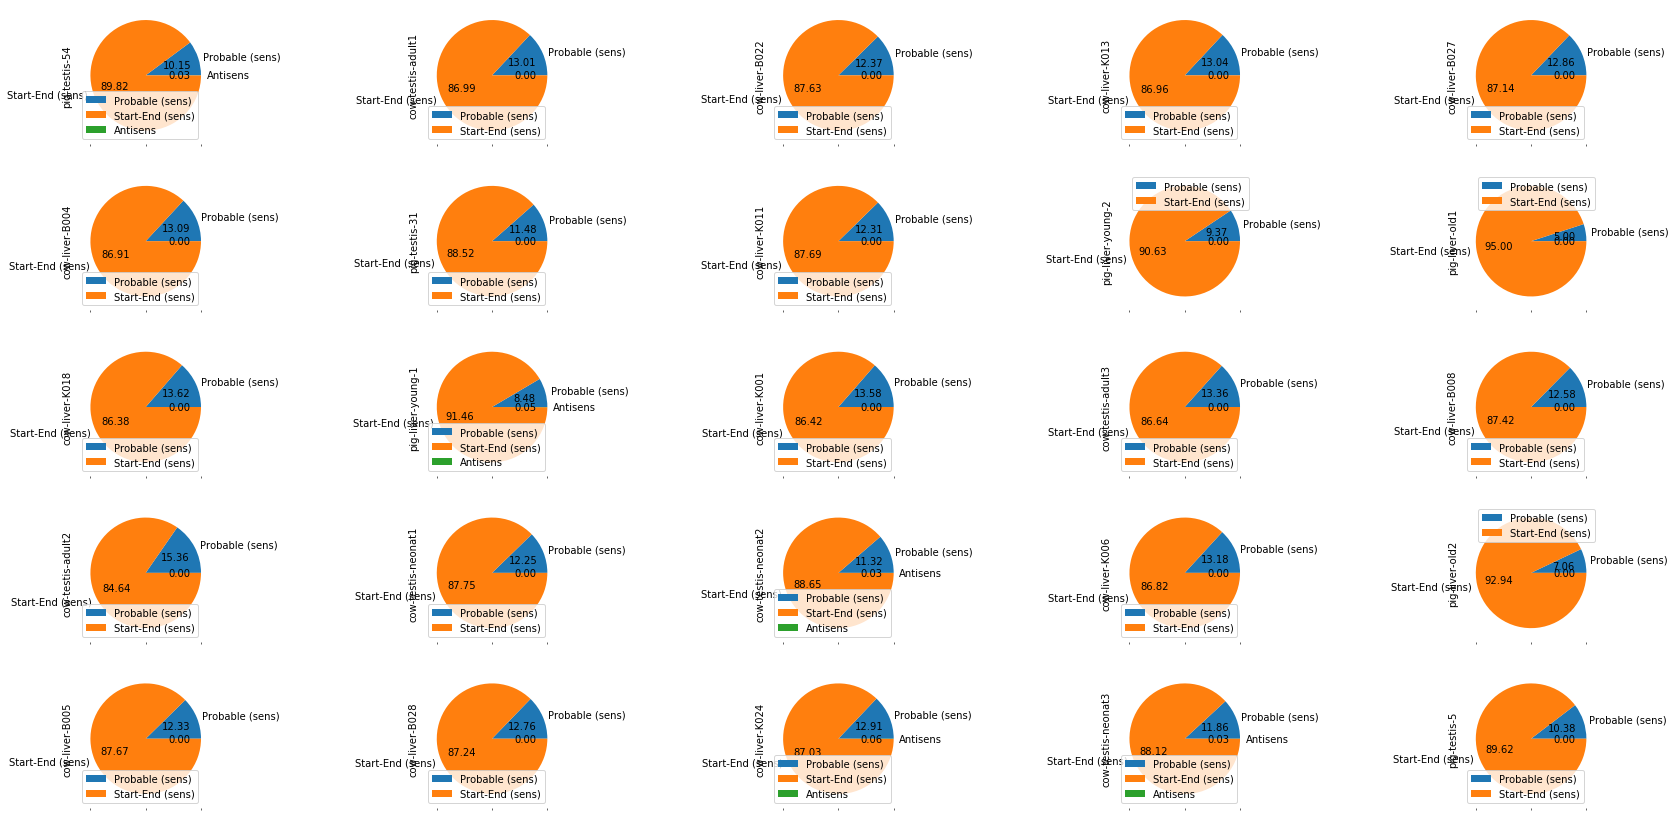

In [93]:
# Pie:
df3["%_probable_exonic"] = (df_stats_annot["nb_probable_exonic"]*100)/df_stats_annot["nb_tot_exonic"]
df3["%_start_end_exonic"] = (df_stats_annot["nb_start_end_exonic"]*100)/df_stats_annot["nb_tot_exonic"]
df3["%_antisens_exonic"] = (df_stats_annot["nb_antisens_exonic"]*100)/df_stats_annot["nb_tot_exonic"]
d = df3.set_index('sample')[["%_probable_exonic","%_start_end_exonic","%_antisens_exonic"]].T.to_dict('list')
df3 = pd.DataFrame(d, index=['Probable (sens)', 'Start-End (sens)', 'Antisens'])
display(df3.head(5))
plot = df3.plot.pie(subplots=True, autopct='%.2f', figsize=(30, 30), layout=(10,5));

## b. Number of monoexonic / infraexonic circRNAs:

,pig-testis-54,cow-testis-adult1,cow-liver-B022,cow-liver-K013,cow-liver-B027,cow-liver-B004,pig-testis-31,cow-liver-K011,pig-liver-young-2,pig-liver-old1,...,cow-testis-adult2,cow-testis-neonat1,cow-testis-neonat2,cow-liver-K006,pig-liver-old2,cow-liver-B005,cow-liver-B028,cow-liver-K024,cow-testis-neonat3,pig-testis-5
Monoexonic (sens),2.543235,3.223949,2.332155,2.593660,2.477876,2.154828,2.131078,2.462687,2.816901,3.742802,...,2.816901,2.838893,3.870595,3.222749,3.596127,2.447552,2.287778,3.003195,3.541186,2.608019
Infraexonic_tot,4.883011,5.123777,22.897527,32.853026,36.165192,29.688747,3.002114,36.641791,40.596520,13.531670,...,5.049811,3.548616,4.650491,38.672986,11.295528,30.856643,35.099338,32.396166,4.131383,4.768392
Other_exonic,92.573754,91.652274,74.770318,64.553314,61.356932,68.156425,94.866808,60.895522,56.586578,82.725528,...,92.133288,93.612491,91.478914,58.104265,85.108345,66.695804,62.612884,64.600639,92.327431,92.623589


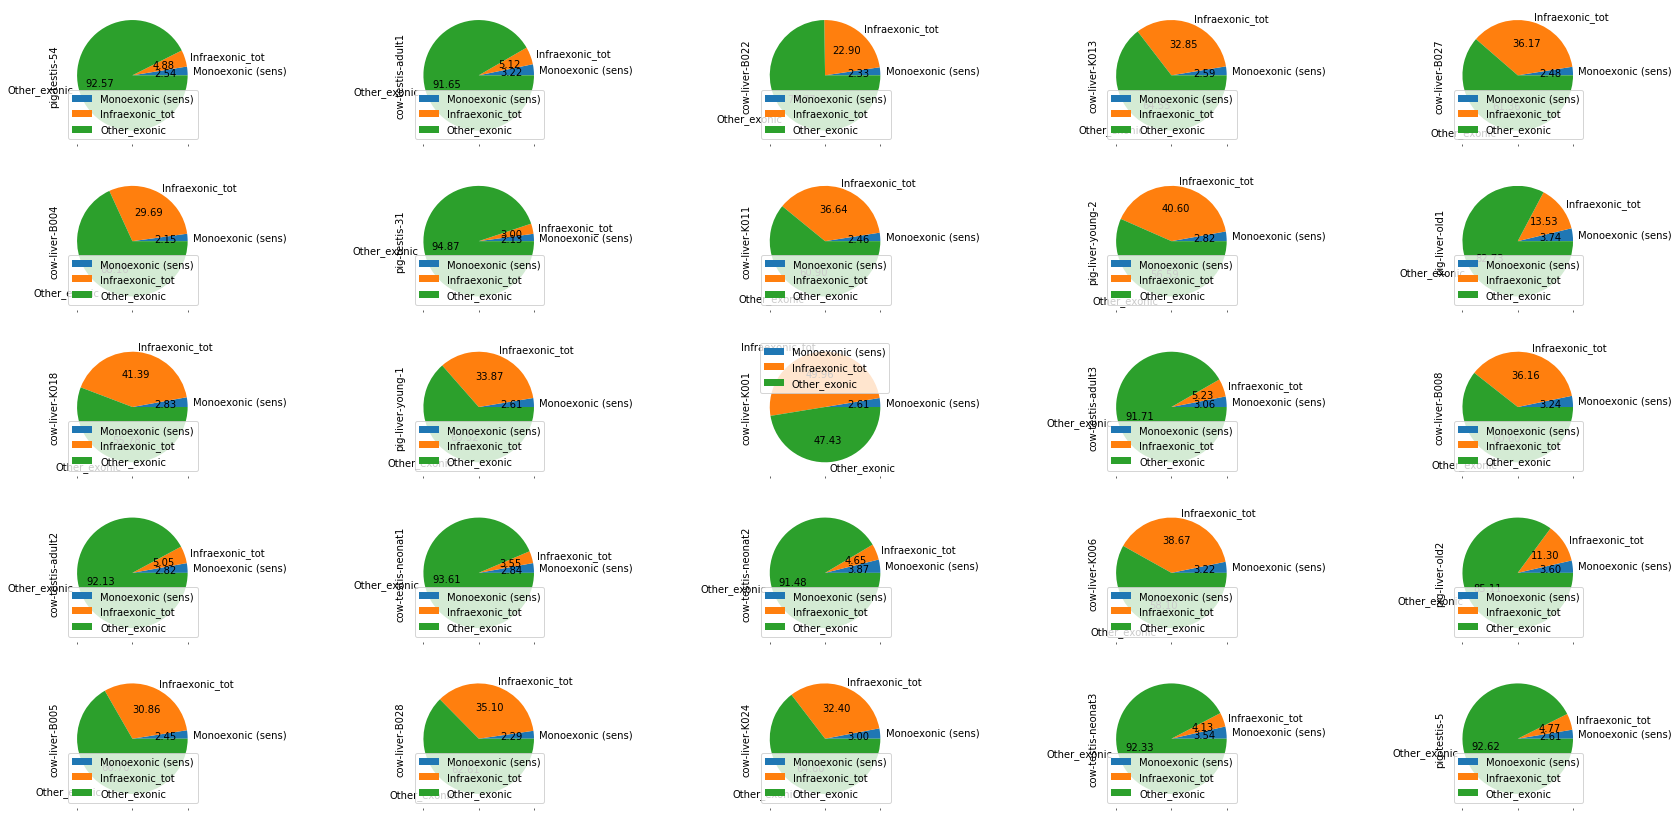

In [94]:
# Pie:
columns_df4 = ["sample", "nb_tot_exonic", "nb_monoexonic", "nb_infraexonic_tot"]
df4 = pd.DataFrame(df_stats_annot, columns=columns_df4)
df4["nb_other_exonic"] = df4["nb_tot_exonic"] - (df4["nb_monoexonic"] + df4["nb_infraexonic_tot"])
df4["%_monoexonic"] = (df4["nb_monoexonic"]*100)/df4["nb_tot_exonic"]
df4["%_infraexonic_tot"] = (df4["nb_infraexonic_tot"]*100)/df4["nb_tot_exonic"]
df4["%_other_exonic"] = (df4["nb_other_exonic"]*100)/df4["nb_tot_exonic"]

d = df4.set_index('sample')[["%_monoexonic", "%_infraexonic_tot", "%_other_exonic"]].T.to_dict('list')
df4 = pd.DataFrame(d, index=['Monoexonic (sens)', 'Infraexonic_tot', 'Other_exonic'])
display(df4.head(5))
plot = df4.plot.pie(subplots=True, autopct='%.2f', figsize=(30, 30), layout=(10,5));

## c. Infra-exonic circRNAs (sens / antisens):

,pig-testis-54,cow-testis-adult1,cow-liver-B022,cow-liver-K013,cow-liver-B027,cow-liver-B004,pig-testis-31,cow-liver-K011,pig-liver-young-2,pig-liver-old1,...,cow-testis-adult2,cow-testis-neonat1,cow-testis-neonat2,cow-liver-K006,pig-liver-old2,cow-liver-B005,cow-liver-B028,cow-liver-K024,cow-testis-neonat3,pig-testis-5
Infraexonic_sens,97.395833,97.752809,100.0,99.561404,99.347471,100.0,94.929577,99.796334,96.530612,94.326241,...,98.639456,94.666667,96.273292,100.0,96.734694,100.0,99.656947,100.0,93.78882,97.142857
Infraexonic_antisens,2.604167,2.247191,0.0,0.438596,0.652529,0.0,5.070423,0.203666,3.469388,5.673759,...,1.360544,5.333333,3.726708,0.0,3.265306,0.0,0.343053,0.0,6.21118,2.857143


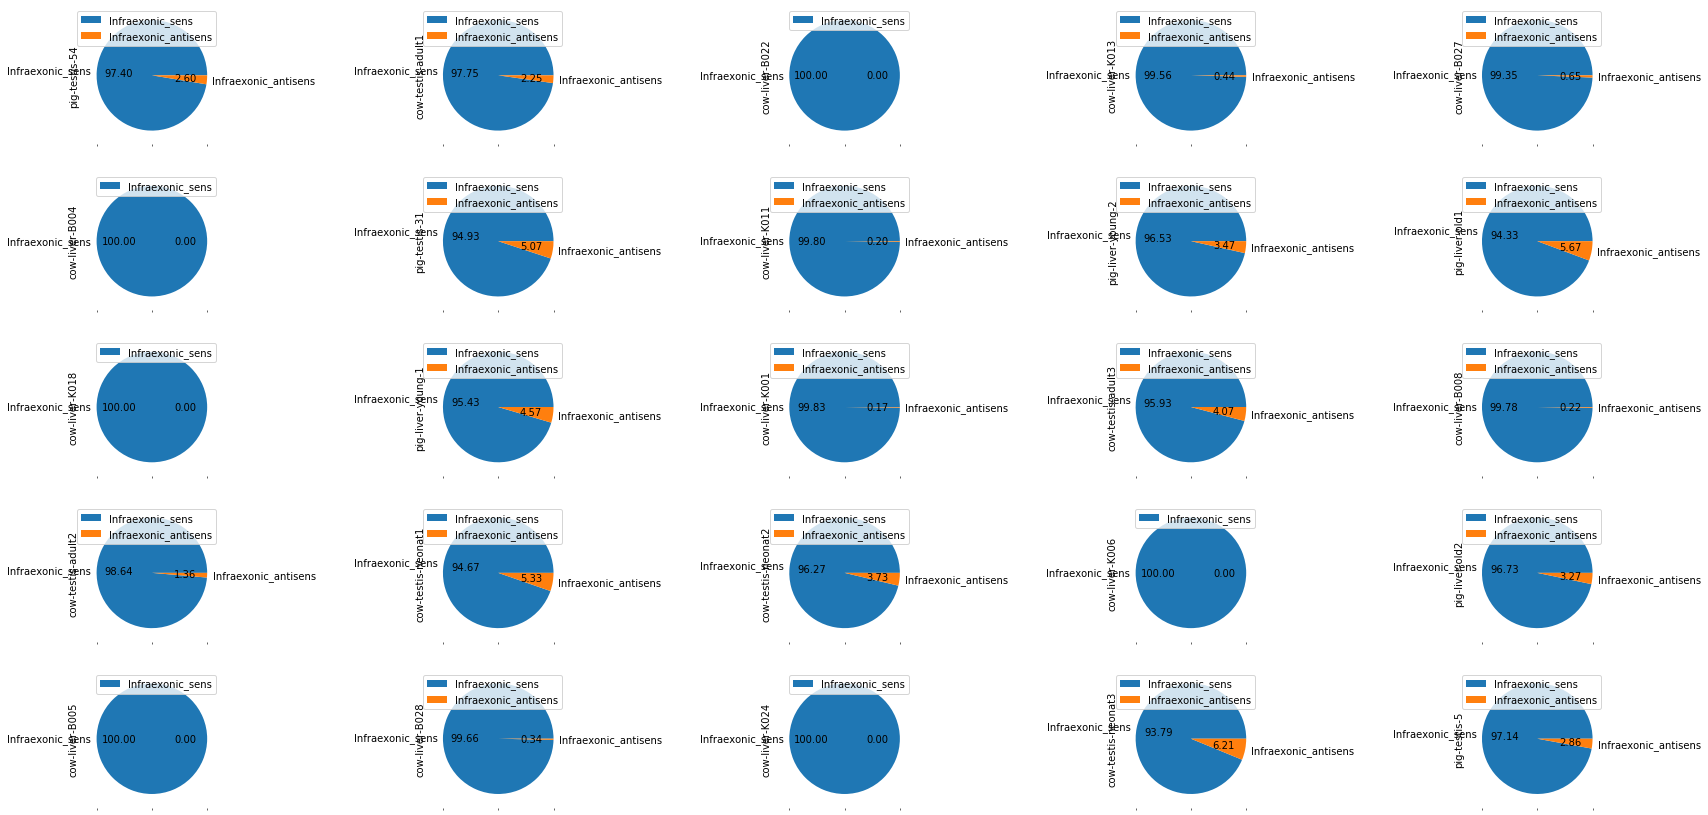

In [95]:
# Pie:
columns_df5 = ["sample", "nb_infraexonic_tot", "nb_infraexonic_sens", "nb_infraexonic_antisens"]
df5 = pd.DataFrame(df_stats_annot, columns=columns_df5)
df5["%_infraexonic_sens"] = (df5["nb_infraexonic_sens"]*100)/df5["nb_infraexonic_tot"]
df5["%_infraexonic_antisens"] = (df5["nb_infraexonic_antisens"]*100)/df5["nb_infraexonic_tot"]
d = df5.set_index('sample')[["%_infraexonic_sens", "%_infraexonic_antisens"]].T.to_dict('list')
df5 = pd.DataFrame(d, index=['Infraexonic_sens', 'Infraexonic_antisens'])
display(df5)
plot = df5.plot.pie(subplots=True, autopct='%.2f', figsize=(30, 30), layout=(10,5));

# II. Intronic circRNAs:

## a. Number of intronic circRNAs for each category:

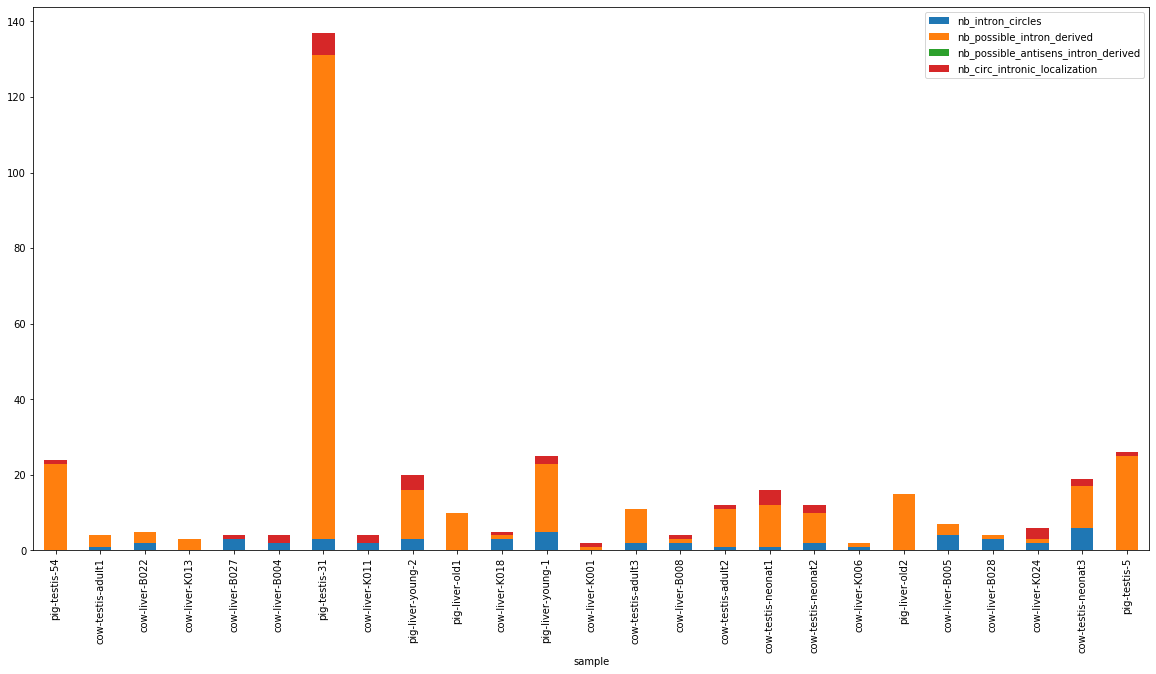

In [96]:
# Stacked bar plot:
columns_df6 = ["sample", "nb_intron_circles", "nb_possible_intron_derived", 
               "nb_possible_antisens_intron_derived", 
               "nb_circ_intronic_localization"]
df6 = pd.DataFrame(df_stats_annot, columns=columns_df6)
df6.plot.bar(x='sample', stacked=True, figsize=(20,10));

,pig-testis-54,cow-testis-adult1,cow-liver-B022,cow-liver-K013,cow-liver-B027,cow-liver-B004,pig-testis-31,cow-liver-K011,pig-liver-young-2,pig-liver-old1,...,cow-testis-adult2,cow-testis-neonat1,cow-testis-neonat2,cow-liver-K006,pig-liver-old2,cow-liver-B005,cow-liver-B028,cow-liver-K024,cow-testis-neonat3,pig-testis-5
Intron-circles (sens),0.000000,25.0,40.0,0.0,75.0,50.0,2.189781,50.0,15.0,0.0,...,8.333333,6.25,16.666667,50.0,0.0,57.142857,75.0,33.333333,31.578947,0.000000
Possible_sens_intron_derived,95.833333,75.0,60.0,100.0,0.0,0.0,93.430657,0.0,65.0,100.0,...,83.333333,68.75,66.666667,50.0,100.0,42.857143,25.0,16.666667,57.894737,96.153846
Possible_antisens_intron_derived,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Intronic_localization (sens),4.166667,0.0,0.0,0.0,25.0,50.0,4.379562,50.0,20.0,0.0,...,8.333333,25.00,16.666667,0.0,0.0,0.000000,0.0,50.000000,10.526316,3.846154


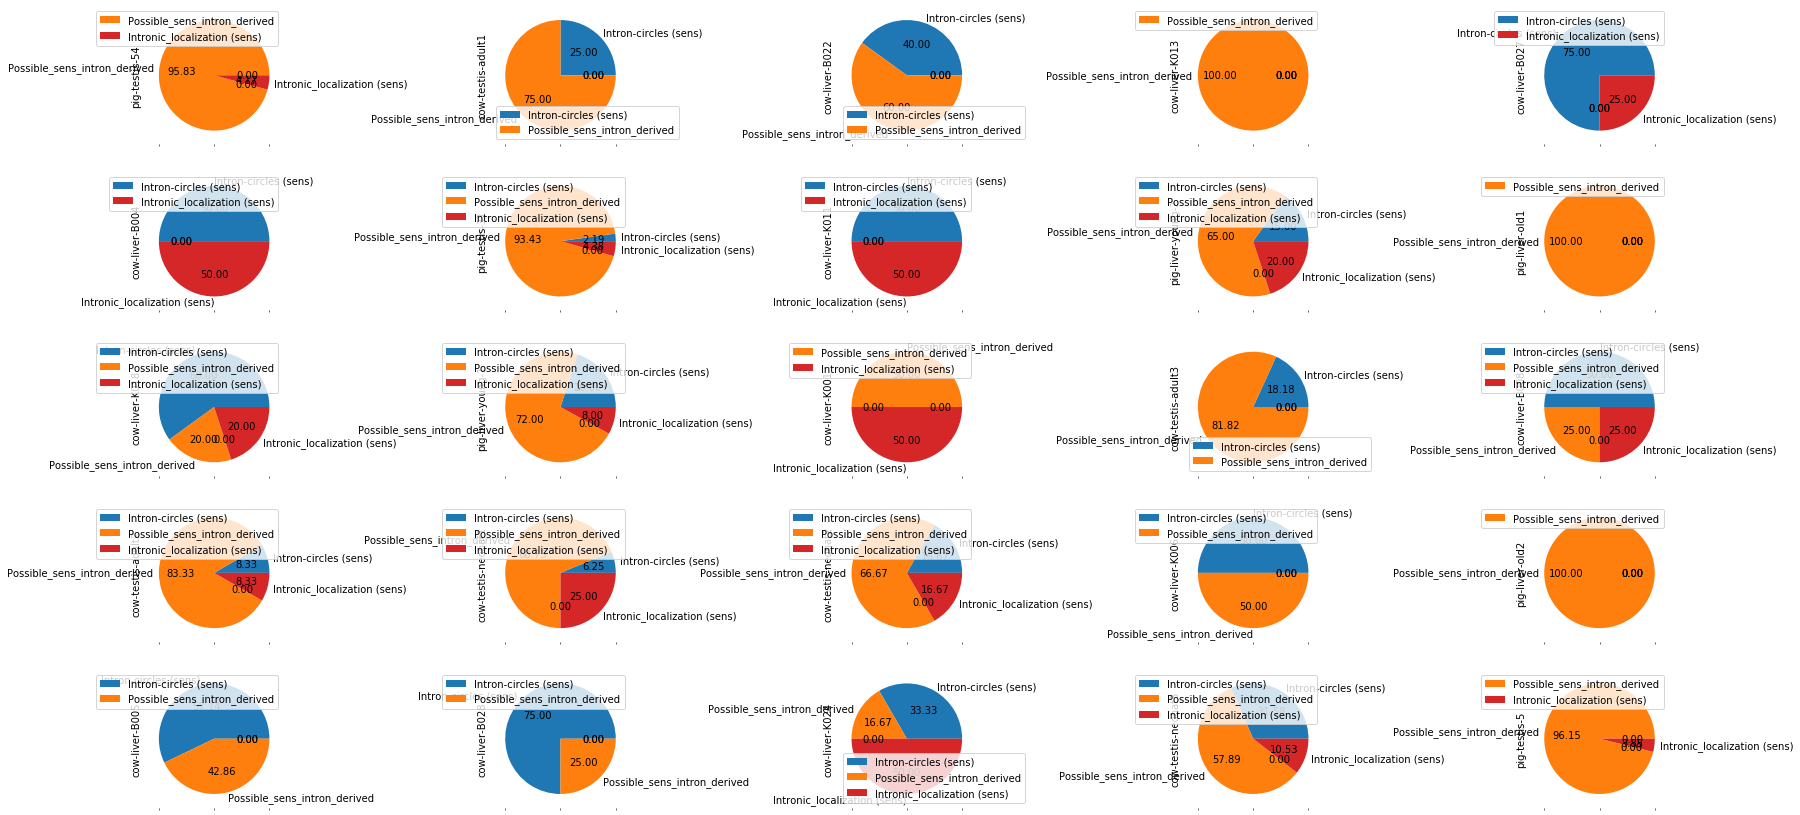

In [97]:
# Pie:
columns_df6 = ["sample", "nb_true_intronic", "nb_intron_circles", "nb_possible_intron_derived", 
               "nb_possible_antisens_intron_derived", 
               "nb_circ_intronic_localization"]
df6 = pd.DataFrame(df_stats_annot, columns=columns_df6)
df6["%_intron_circles"] = (df6["nb_intron_circles"]*100)/df6["nb_true_intronic"]
df6["%_possible_intron_derived"] = (df6["nb_possible_intron_derived"]*100)/df6["nb_true_intronic"]
df6["%_possible_antisens_intron_derived"] = (df6["nb_possible_antisens_intron_derived"]*100)/df6["nb_true_intronic"]
df6["%_circ_intronic_localization"] = (df6["nb_circ_intronic_localization"]*100)/df6["nb_true_intronic"]
d = df6.set_index('sample')[["%_intron_circles", "%_possible_intron_derived",
                             "%_possible_antisens_intron_derived", 
                             "%_circ_intronic_localization"]].T.to_dict('list')
df6 = pd.DataFrame(d, index=["Intron-circles (sens)", "Possible_sens_intron_derived",
                             "Possible_antisens_intron_derived",
                             "Intronic_localization (sens)"])
display(df6.head(5))

plot = df6.plot.pie(subplots=True, autopct='%.2f', figsize=(30, 30), layout=(10,5));

## b. Possible-intron-derived circRNAs (lariat-derived CircRNAs / others):

,pig-testis-54,cow-testis-adult1,cow-liver-B022,cow-liver-K013,pig-testis-31,pig-liver-young-2,pig-liver-old1,cow-liver-K018,pig-liver-young-1,cow-liver-K001,...,cow-testis-adult2,cow-testis-neonat1,cow-testis-neonat2,cow-liver-K006,pig-liver-old2,cow-liver-B005,cow-liver-B028,cow-liver-K024,cow-testis-neonat3,pig-testis-5
Lariat-derived (sens),43.478261,33.333333,66.666667,66.666667,44.53125,30.769231,30.0,100.0,50.0,100.0,...,50.0,45.454545,50.0,0.0,46.666667,66.666667,100.0,0.0,45.454545,36.0
Other (sens),56.521739,66.666667,33.333333,33.333333,55.46875,69.230769,70.0,0.0,50.0,0.0,...,50.0,54.545455,50.0,100.0,53.333333,33.333333,0.0,100.0,54.545455,64.0


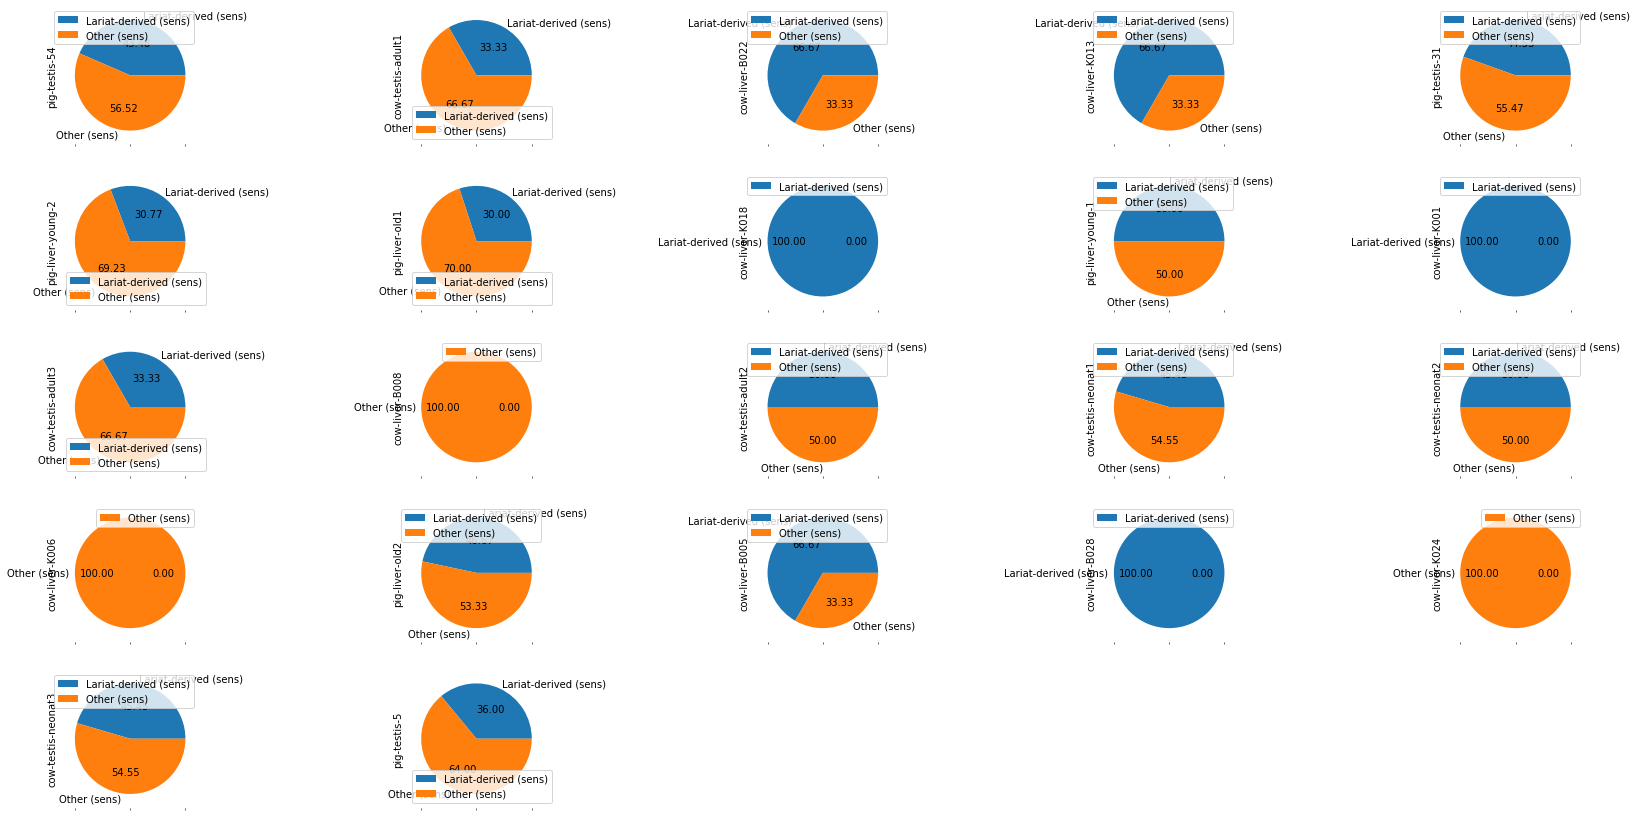

In [109]:
# Pie:
columns_df7 = ["sample", "nb_possible_intron_derived", "nb_lariat_derived"]
df7 = pd.DataFrame(df_stats_annot, columns=columns_df7)
df7["nb_other"] = df7["nb_possible_intron_derived"] - df7["nb_lariat_derived"]
df7["%_lariat_derived"] = (df7["nb_lariat_derived"]*100)/df7["nb_possible_intron_derived"]
df7["%_other"] = (df7["nb_other"]*100)/df7["nb_possible_intron_derived"]
d = df7.set_index('sample')[["%_lariat_derived", "%_other"]].T.to_dict('list')
df7 = pd.DataFrame(d, index=['Lariat-derived (sens)', 'Other (sens)'])
df7 = df7.dropna(axis=1, how='all')
display(df7.head(5))

plot = df7.plot.pie(subplots=True, autopct='%.2f', figsize=(30, 30), layout=(10,5));

## c. Infra-intronic circRNAs (sens / antisens)

,pig-testis-54,cow-testis-adult1,cow-liver-B022,cow-liver-K013,cow-liver-B027,cow-liver-B004,pig-testis-31,cow-liver-K011,pig-liver-young-2,pig-liver-old1,...,cow-testis-adult2,cow-testis-neonat1,cow-testis-neonat2,cow-liver-K006,pig-liver-old2,cow-liver-B005,cow-liver-B028,cow-liver-K024,cow-testis-neonat3,pig-testis-5
Infraintronic_sens,82.307692,85.106383,96.875,93.023256,90.0,97.297297,89.292196,93.333333,95.25066,98.75,...,87.692308,92.424242,94.202899,100.0,95.555556,100.0,92.307692,96.078431,95.348837,90.340909
Infraintronic_antisens,17.692308,14.893617,3.125,6.976744,10.0,2.702703,10.707804,6.666667,4.74934,1.25,...,12.307692,7.575758,5.797101,0.0,4.444444,0.0,7.692308,3.921569,4.651163,9.659091


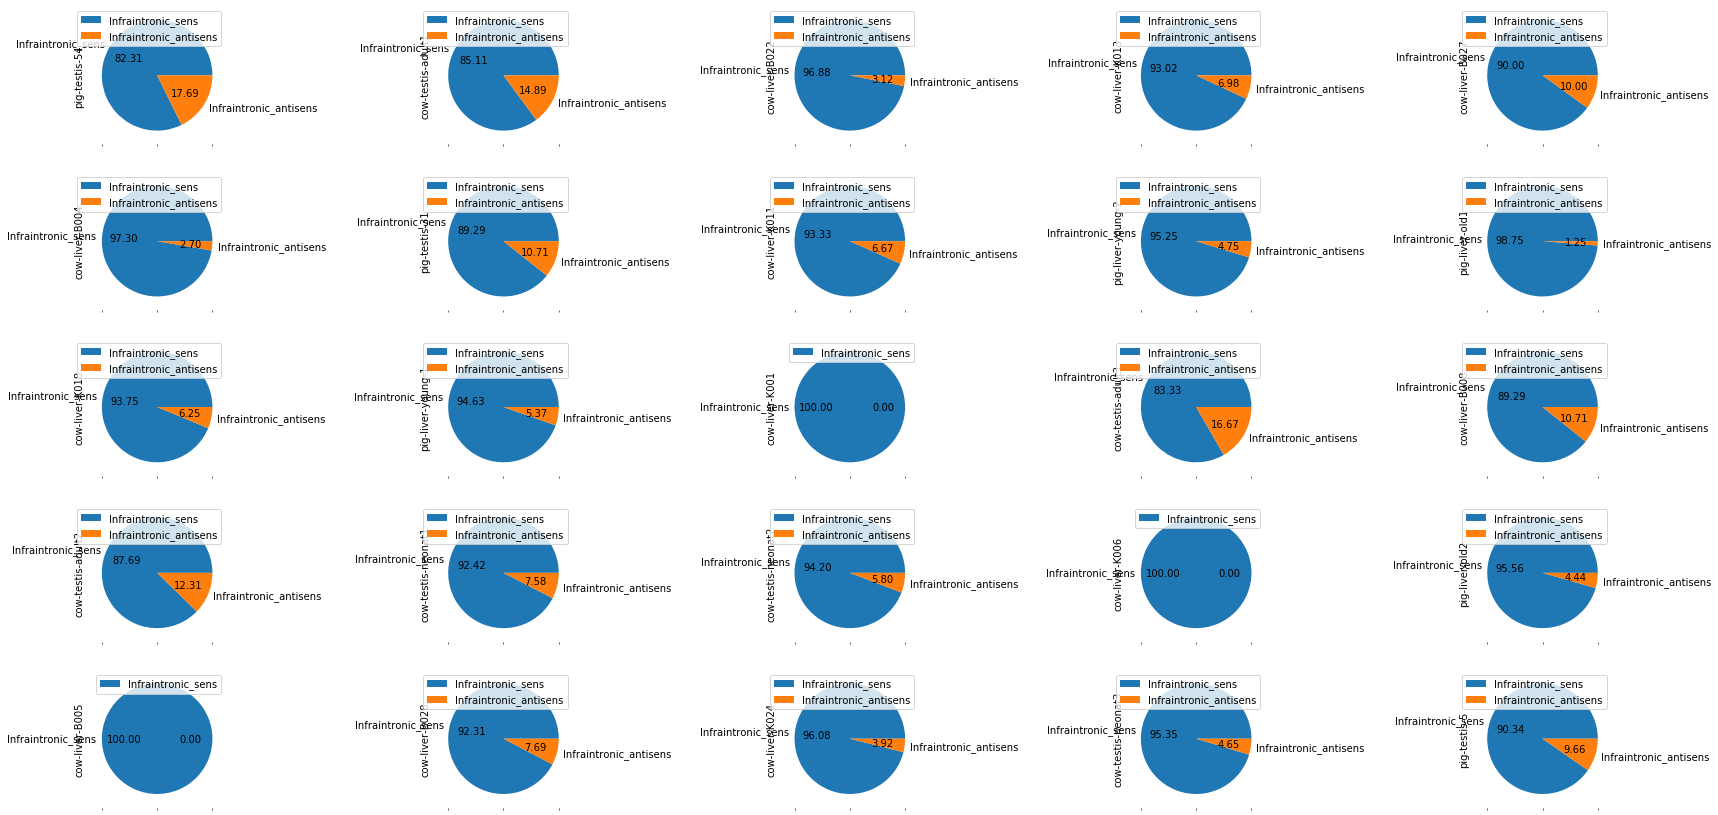

In [110]:
# Pie:
columns_df6 = ["sample", "nb_infraintronic_tot", "nb_infraintronic_sens", "nb_infraintronic_antisens"]
df6 = pd.DataFrame(df_stats_annot, columns=columns_df6)
df6["%_infraintronic_sens"] = (df6["nb_infraintronic_sens"]*100)/df6["nb_infraintronic_tot"]
df6["%_infraintronic_antisens"] = (df6["nb_infraintronic_antisens"]*100)/df6["nb_infraintronic_tot"]
d = df6.set_index('sample')[["%_infraintronic_sens", "%_infraintronic_antisens"]].T.to_dict('list')
df6 = pd.DataFrame(d, index=['Infraintronic_sens', 'Infraintronic_antisens'])
display(df6)
plot = df6.plot.pie(subplots=True, autopct='%.2f', figsize=(30, 30), layout=(10,5));